## Regression with a Wild Blueberry Yield Dataset

In this project, we will use regression techniques to predict wild blueberries productivity. Blueberry productivity is an important metric for increasing agricultural production, and accurate predictions can help producers in their decision-making processes. By splitting our data into training and test sets, we will create various regression models, make predictions, and evaluate the results.

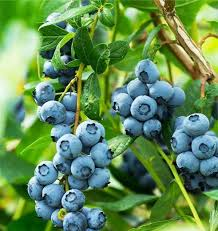

<a href='https://www.kaggle.com/competitions/playground-series-s3e14/' target=_blank>You can find the competition here</a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e14/sample_submission.csv
/kaggle/input/playground-series-s3e14/train.csv
/kaggle/input/playground-series-s3e14/test.csv


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('/kaggle/input/playground-series-s3e14/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s3e14/test.csv')
#Reading the file.

## EDA 

In [4]:
train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [5]:
test.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [6]:
train.shape, test.shape

((15289, 18), (10194, 17))

In [7]:
train.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [8]:
test.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10194 non-null  int64  
 1   clonesize             10194 non-null  float64
 2   honeybee              10194 non-null  float64
 3   bumbles               10194 non-null  float64
 4   andrena               10194 non-null  float64
 5   osmia                 10194 non-null  float64
 6   MaxOfUpperTRange      10194 non-null  float64
 7   MinOfUpperTRange      10194 non-null  float64
 8   AverageOfUpperTRange  10194 non-null  float64
 9   MaxOfLowerTRange      10194 non-null  float64
 10  MinOfLowerTRange      10194 non-null  float64
 11  AverageOfLowerTRange  10194 non-null  float64
 12  RainingDays           10194 non-null  float64
 13  AverageRainingDays    10194 non-null  float64
 14  fruitset              10194 non-null  float64
 15  fruitmass          

In [11]:
df=pd.concat([train,test])
#Merge the files.

In [12]:
df.shape

(25483, 18)

In [13]:
df.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


## Data Visualization

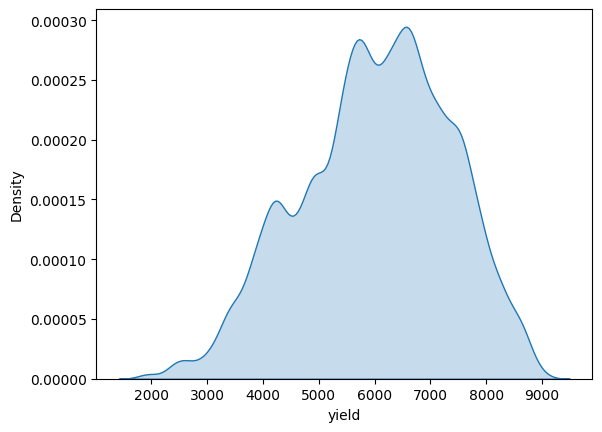

In [14]:
sns.kdeplot(x=df['yield'], fill=True);

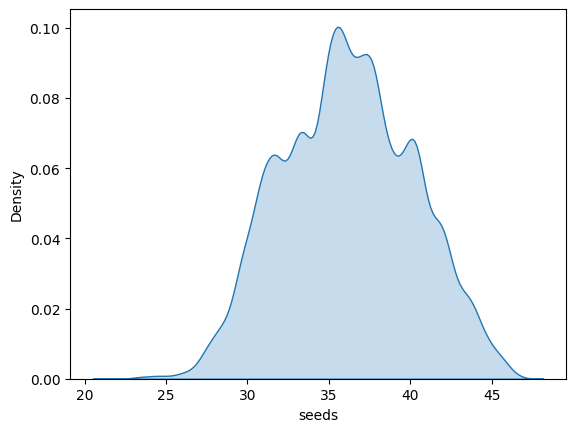

In [15]:
sns.kdeplot(x=df['seeds'], fill=True);

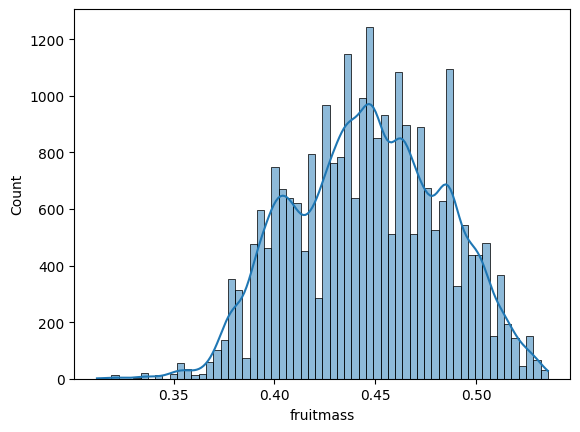

In [16]:
sns.histplot(x=df['fruitmass'], kde=True);

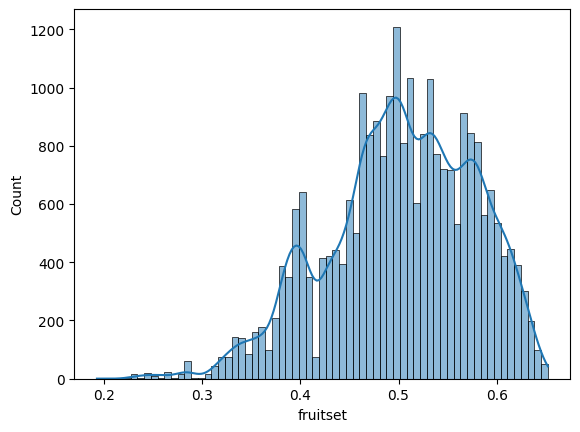

In [17]:
sns.histplot(x=df['fruitset'], kde=True);

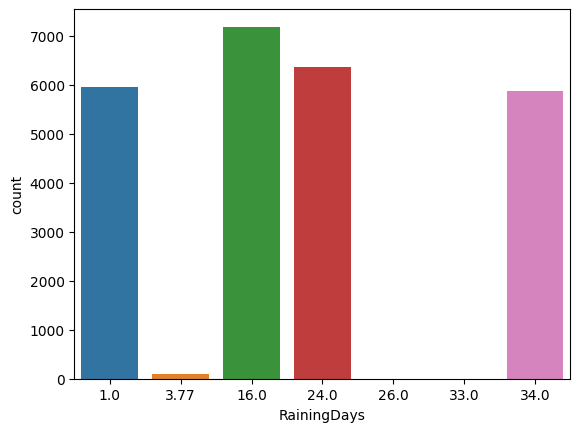

In [18]:
sns.countplot(x=df['RainingDays']);

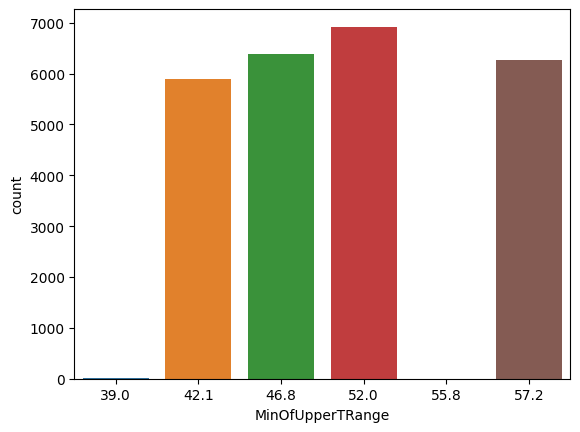

In [19]:
sns.countplot(x=df['MinOfUpperTRange']);

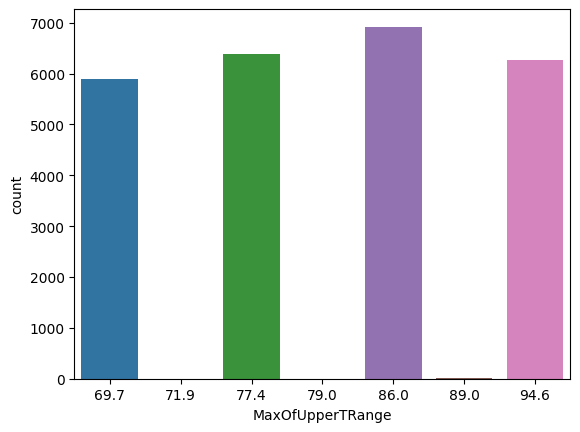

In [20]:
sns.countplot(x=df['MaxOfUpperTRange']);

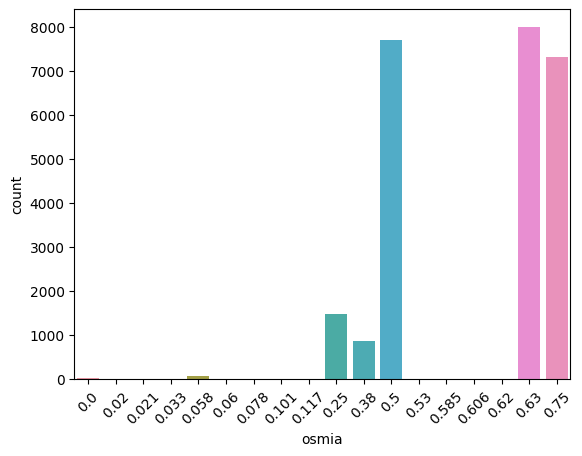

In [21]:
sns.countplot(x=df['osmia'])
plt.xticks(rotation=45);

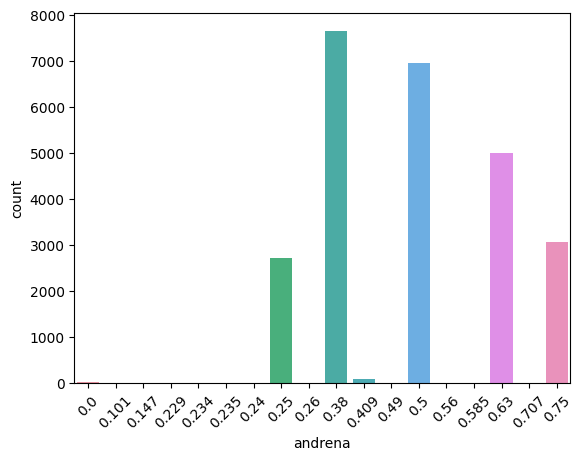

In [22]:
sns.countplot(x=df['andrena'])
plt.xticks(rotation=45);

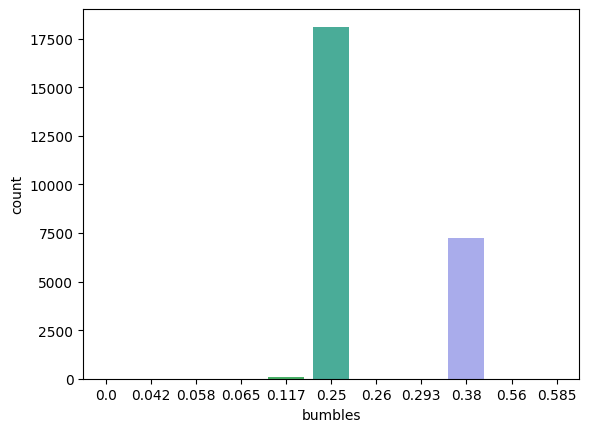

In [23]:
sns.countplot(x=df['bumbles']);

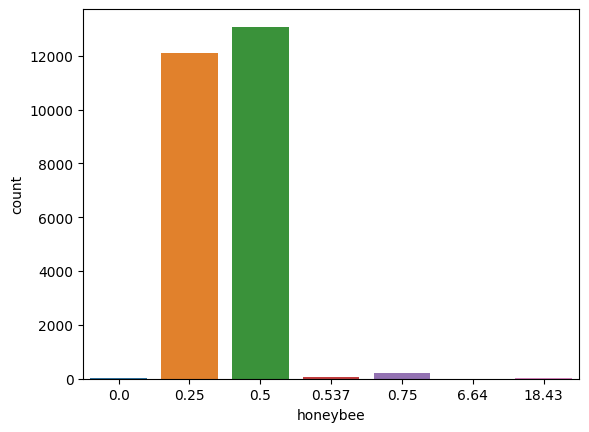

In [24]:
sns.countplot(x=df['honeybee']);

In [25]:
train.drop('id', axis=1, inplace=True)

In [26]:
train.shape

(15289, 17)

In [27]:
train=df[:15289]
test=df[15289:]

In [28]:
train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


## Modelling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
x=train.drop('yield', axis=1)
y=train[['yield']]

In [31]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=42)

In [32]:
lr=LinearRegression()
model=lr.fit(x_train, y_train)
pred=lr.predict(x_test)
rmse=mean_squared_error(y_test, pred)**.5
r2=r2_score(y_test, pred)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 577.1867374576624
R2 Score: 0.8104910648153388


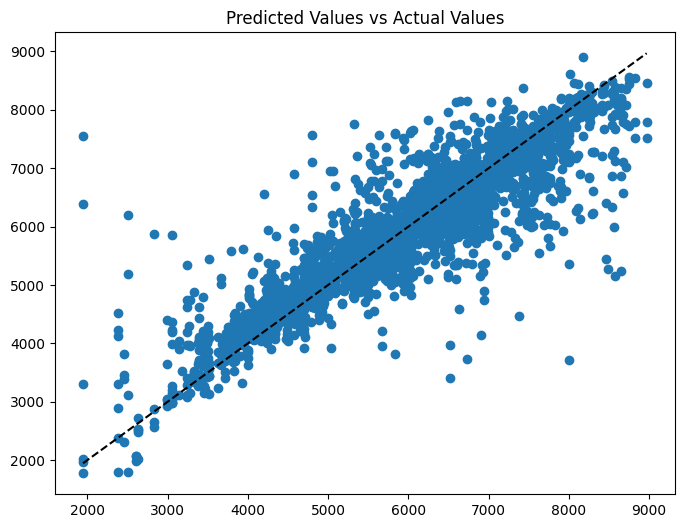

In [33]:
y_pred=model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Predicted Values vs Actual Values');
#for Linear Regression

In [34]:
feature_importance=pd.DataFrame({'Feature':x_train.columns, 'Coefs':lr.coef_[0]})

In [35]:
feature_importance=feature_importance.sort_values(by='Coefs', ascending=False)

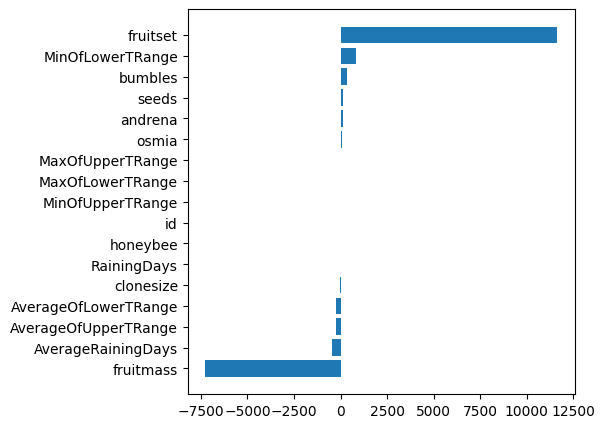

In [36]:
plt.figure(figsize=(5,5))
plt.barh(feature_importance['Feature'],feature_importance['Coefs'])
plt.gca().invert_yaxis()

In [37]:
residuals=y_test-pred

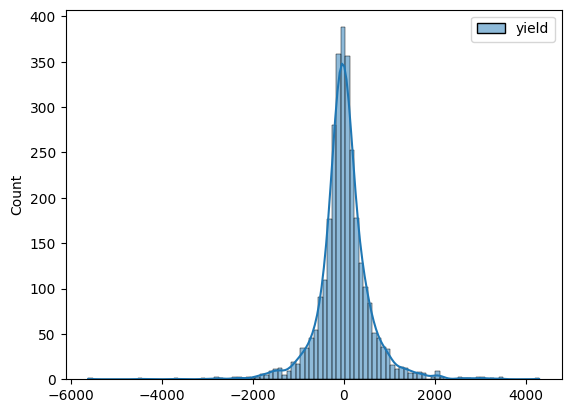

In [38]:
sns.histplot(residuals, kde=True,bins=100);

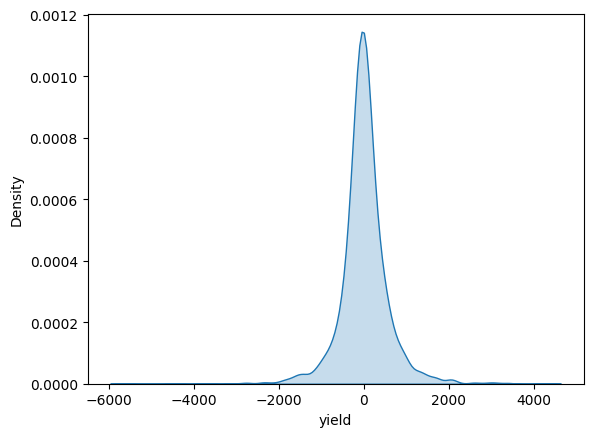

In [39]:
sns.kdeplot(x=residuals['yield'], fill=True);

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
   
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [41]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,8.244285e-01,5.555569e+02,3.498956e+02
Linear,8.104911e-01,5.771867e+02,3.704280e+02
Ridge,8.080949e-01,5.808242e+02,3.732553e+02
XGBRegressor,8.070345e-01,5.824267e+02,3.740184e+02
Lasso,8.042094e-01,5.866747e+02,3.791067e+02
ElasticNet,7.640922e-01,6.439803e+02,4.331246e+02
mlp_regressor,7.445860e-01,6.700756e+02,4.707940e+02
KNeighborsRegressor,6.879207e-01,7.406857e+02,5.430315e+02
Decision Tree,6.340247e-01,8.020979e+02,5.234626e+02
Extra Tree,6.142987e-01,8.234307e+02,5.422579e+02


## Test Data Prediction

In [44]:
gbc = GradientBoostingRegressor()
gbc.fit(x_train, y_train)

test_data = pd.read_csv('/kaggle/input/playground-series-s3e14/test.csv')  

pred = gbc.predict(test_data)

mae = mean_absolute_error(y_test, gbc.predict(x_test))
print('Mean Absolute Error (MAE):', mae)

submission = pd.DataFrame({'ID': test_data['id'], 'Yield': pred})

submission.to_csv('blueberry_submission.csv', index=False)

Mean Absolute Error (MAE): 349.95237565847077


## Summary

In this project,we loaded our training and test datasets and merged them. We performed basic analysis by plotting graphs on the data. We specifically examined the effects of independent variables on blueberry yield. We split the merged dataset into training and test sets again. We created different regression models (e.g. Linear Regression, Gradient Boosting, etc.). We evaluated the performance of our model by making predictions on the test dataset. We visualized the residuals and regression coefficients. We recorded the prediction results in a DataFrame and evaluated them with Mean Absolute Error (MAE).